In [1]:
import cobra
import os
from os.path import join

import pandas
pandas.options.display.max_rows = 100

import pandas
pandas.options.display.max_rows = 300

%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

data_dir = "/Users/david/Dropbox (UCSD SBRG)/Xam_Multistrain_Recon/Metabolic_model/BiGG_Model/"
xam_model = cobra.io.read_sbml_model(join(data_dir, "Xam_BiGG_full_media.xml"))

### Original model

In [3]:
print (len(xam_model.reactions))
print (len(xam_model.metabolites))
print (len(xam_model.genes))

1556
1527
890


In [4]:
c=0
for i in [i.id for i in xam_model.reactions if len(i.metabolites) == 1]:
    reaction = xam_model.reactions.get_by_id(i)
    print('%s\t%i\t%i' % (reaction.id, reaction.lower_bound, reaction.upper_bound))
    c+=1
print c

EX_2ddglcn_e	-10	1000
EX_4hbz_e	-10	1000
EX_ac_e	-10	1000
EX_acald_e	-10	1000
EX_acgam_e	-10	1000
EX_adn_e	-10	1000
EX_akg_e	-10	1000
EX_ala__D_e	-10	1000
EX_arab__L_e	-10	1000
EX_arbt_e	-10	1000
EX_arg__L_e	-10	1000
EX_ASPt5n_e	-10	1000
EX_Biomass_e	-10	1000
EX_ca2_e	-10	1000
EX_cbl1_e	-10	1000
EX_cd2_e	-10	1000
EX_chol_e	-10	1000
EX_cit_e	-10	1000
EX_cl_e	-10	1000
EX_co2_e	-10	1000
EX_cobalt2_e	-10	1000
EX_cu2_e	-10	1000
EX_cytd_e	-10	1000
EX_dad_2_e	-10	1000
EX_dcyt_e	-10	1000
EX_dgsn_e	-10	1000
EX_din_e	-10	1000
EX_DNA_e	-10	1000
EX_duri_e	-10	1000
EX_etha_e	-10	1000
EX_etoh_e	-10	1000
EX_fe2_e	-10	1000
EX_fe3_e	-10	1000
EX_for_e	-10	1000
EX_fru_e	-10	1000
EX_fum_e	-10	1000
EX_galt_e	-10	1000
EX_galur_e	-10	1000
EX_gam_e	-10	1000
EX_glc__D_e	-10	1000
EX_glcur_e	-10	1000
EX_gln__L_e	-10	1000
EX_glu__L_e	-10	1000
EX_gly_e	-10	1000
EX_glyb_e	-10	1000
EX_glyc_e	-10	1000
EX_glycogen_e	-10	1000
EX_h_e	-10	1000
EX_h2o_e	-10	1000
EX_hdca_e	-10	1000
EX_hxan_e	-10	1000
EX_ins_e	-10	1000
EX_k

### FBA

In [5]:
xam_model.objective = "Biomass"
FBA_sol = xam_model.optimize()
print (FBA_sol)

<Solution 10.00 at 0x1067ba8d0>


In [6]:
xam_model.solution.status

'optimal'

In [7]:
FBA_results = xam_model.solution.x_dict
fba_df = pandas.DataFrame.from_dict(FBA_results, orient='index').T.round(5)
fba_df_t = pandas.DataFrame.transpose(fba_df)
fba_df_t = fba_df_t.rename_axis("Reaction")
fba_df_t = fba_df_t.rename_axis({0: "Flux"}, axis="columns")
print(fba_df_t)

                        Flux
Reaction                    
CSND                 0.00000
MNXR8691            -0.00000
NTD10               70.32855
NTD11                0.00000
GLYBabc              0.00000
XTSNH              -70.32855
DDPA                -2.84485
P5CD                 0.00000
P5CR               -53.48435
GLUTRR              -0.49543
GLUTRS              -0.49543
MG2t                 0.03096
KARI_23dhmp         41.22050
ACALDt            -182.15748
CO2t               -21.38295
MNXR3469             0.00000
KARI_23dhmb      -1000.00000
GUDBUTNAH            0.00000
PANTS               -0.06193
E4PD                 0.00000
PLIPA2A180pp         0.00000
MNXR87148            1.00042
TDPGDH               0.25011
CYTDt2              10.00000
MNXR8073             0.00000
CYOO2pp              0.00000
GAPDH_nadp_hi        0.00000
rxn05379_c0         -0.85184
MNXR2826             0.00000
ADSL2r              -1.60761
UAGPT3              -0.25011
UAGPT2               0.00000
GART          

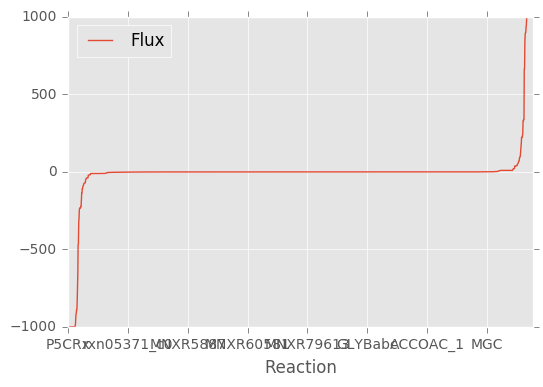

In [8]:
fba_df_sort = fba_df_t.sort_values(by="Flux")
plt.figure()
fba_df_sort.plot.line()

### FVA

In [9]:
fva_results = cobra.flux_analysis.flux_variability_analysis(xam_model, xam_model.reactions, fraction_of_optimum=1)
fva_df = pandas.DataFrame.from_dict(fva_results).T.round(5)
fva_df.index.name = 'reaction'
fva_df.sort_index(kind='heapsort', inplace=1)
print(fva_df)

                  maximum     minimum
reaction                             
10FTHFGLULL       0.00000     0.00000
2DHPFALDL         0.00000     0.00000
2HBO              0.00000     0.00000
2OH3K5MPPISO      0.00000     0.00000
34DHOXPEGOX       0.00000     0.00000
34HPPOR           0.00000     0.00000
3HAO              0.00000     0.00000
3HBCOAHL          0.00000   -39.65939
3HLYTCL           0.00000     0.00000
3OAR100           0.00000     0.00000
3OAR120           0.00000     0.00000
3OAR40_1          0.00000     0.00000
3OAR60            0.00000     0.00000
3OAR80            0.00000     0.00000
3OAS80            0.00000     0.00000
4ABUTD            0.00000     0.00000
4CMLCL_kt         0.00000     0.00000
4HTHRS            0.00000     0.00000
56DH5FLURAAMH     0.00000     0.00000
5FLURAPRT         0.00000     0.00000
5HLTDL            0.00000     0.00000
5HXKYNDCL         0.00000     0.00000
A5PISO           -0.75032    -0.75032
AACOAR_syn        0.00000     0.00000
AACOAT      

In [10]:
fva_df_sort = fva_df.sort_values(by=['maximum', 'minimum'])
print(fva_df_sort)

                   maximum     minimum
reaction                              
EX_DNA_e         -10.00000   -10.00000
EX_protein_e     -10.00000   -10.00000
EX_rna_c0        -10.00000   -10.00000
MCOATA            -9.97201    -9.97201
EX_pi_e           -8.02695   -10.00000
APLh              -7.33815   -47.84938
EX_gln__L_e       -5.11568   -10.00000
IMDHT             -3.75389    -4.60573
IPMD              -3.75389    -4.60573
IPPS              -3.75389    -4.60573
OMCDC             -3.75389    -4.60573
EX_lys__L_e       -3.10449    -3.10449
LYSt2m            -3.10449    -3.10449
CDPMEK            -3.06081    -6.67807
CMS               -3.06081    -6.67807
DXPRIi            -3.06081    -6.67807
DXPS              -3.06081    -6.67807
MCS               -3.06081    -6.67807
DDPA              -2.84485    -2.84485
DHQTi             -2.84485    -2.84485
SHKK              -2.84485    -2.84485
EX_arg__L_e       -2.46697   -10.00000
ACAS_2ahbut       -2.41799   -42.92922
MNXR79704         -2.4179

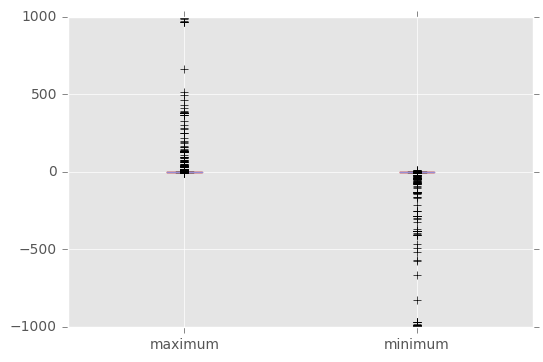

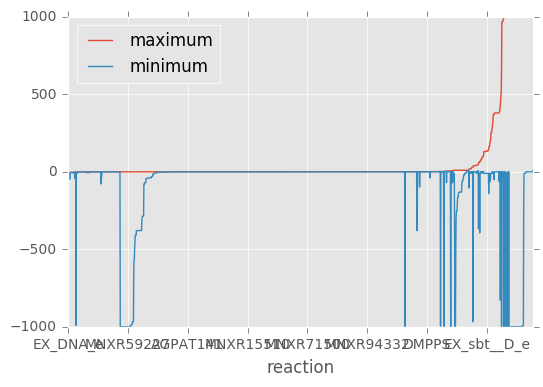

In [11]:
plt.figure(dpi=400)
fva_df_sort.plot.box()
#plt.savefig('FVA_Xam_box_80.svg', format='svg', dpi=1200)
#plt.savefig('FVA_Xam_box_80.png', format='png', dpi=1200)
fva_df_sort.plot.line()
#plt.savefig('FVA_Xam_plot_80.svg', format='svg', dpi=1200)
#plt.savefig('FVA_Xam_plot_80.png', format='png', dpi=1200)

### Fluxes over  a Threshold

In [12]:
import numpy

fva_df_sort_equal = fva_df_sort[(fva_df_sort["maximum"] > 900) | (fva_df_sort["minimum"] < -900)]
print(fva_df_sort_equal)

                  maximum     minimum
reaction                             
PRPPS            -1.70006  -989.95460
ACPh              0.00000 -1000.00000
AGTi              0.00000 -1000.00000
AIRCr             0.00000 -1000.00000
ARGN              0.00000 -1000.00000
ASPK              0.00000 -1000.00000
CS                0.00000 -1000.00000
CYSDS             0.00000 -1000.00000
DCTPD2            0.00000 -1000.00000
DURIK1            0.00000 -1000.00000
FGFTh             0.00000 -1000.00000
G3PD6             0.00000 -1000.00000
G6PBDH            0.00000 -1000.00000
GAPD              0.00000 -1000.00000
GCCa              0.00000 -1000.00000
GCCb              0.00000 -1000.00000
GCCc              0.00000 -1000.00000
GCL               0.00000 -1000.00000
GLCabcpp          0.00000 -1000.00000
GLYCOR_nadp       0.00000 -1000.00000
HEX1              0.00000 -1000.00000
HSK               0.00000 -1000.00000
ICL               0.00000 -1000.00000
MDH               0.00000 -1000.00000
MDHC_nadp_hr

In [13]:
print(len(fva_df_sort_equal))

161


### Exporting S matrix to an array - only FVA fluxes

In [14]:
import numpy as np
import re

#Exporting S_matrix to array formating
S_matrix_xam = xam_model.to_array_based_model(deepcopy_model=True)
S_matrix_array = S_matrix_xam.S.toarray()

row_met = len(S_matrix_array) # Number of metabolites in the model 
col_rxn = len(fva_df_sort_equal) # Number of reactions in FVA

S_matrix_FVA = numpy.zeros((row_met,col_rxn)) # Creating FVA matrix

i=0 # Pointer for reactions in FVA dataframe
m=0 # Pointer for reactions in FVA S-matrix

while (i < len(fva_df_sort_equal)): # Reading all the FVA table
    
    FVA_out = str(fva_df_sort_equal.loc[fva_df_sort_equal.index[i]].name) # Reaction name in FVA
    
    #print(FVA_out)
    #print(xam_model.reactions.get_by_id(FVA_out).reaction)
    
    j=0 # Pointer for reactions in Model S-matrix; equivalent to k but as number
    
    for k in S_matrix_xam.reactions: # Reading reactions in S matrix of model
        
        if(str(k)==FVA_out): # Comparing model reaction name with FVA one
            
            #print(S_matrix_xam.S.getcol(j))
            #print(S_matrix_array[:,j])
            
            l = 0 # Metabolite ointer
            
            while l < row_met: # Assigning every stoichiometric coefficient to FVA S-matrix
                S_matrix_FVA[l,m] = S_matrix_array[l,j]
                l+=1
            
            m+=1 # Moving FVA S-matrix pointer to next position to store a new reaction
            print(FVA_out)
        j+=1
    i+=1
    
print(len(S_matrix_FVA))
print(len(S_matrix_FVA[0]))

PRPPS
ACPh
AGTi
AIRCr
ARGN
ASPK
CS
CYSDS
DCTPD2
DURIK1
FGFTh
G3PD6
G6PBDH
GAPD
GCCa
GCCb
GCCc
GCL
GLCabcpp
GLYCOR_nadp
HEX1
HSK
ICL
MDH
MDHC_nadp_hr
MNXR2832
MNXR58251
MNXR59227
MNXR79878
NO3R1
RBK
SERD_L
SUCD4
SULabc
ALDD2x
G1PACT
PFK_adp
ACS
ADNUC
ADPT
INSH
NADH6
HXAND
HXPRT
XPPT
ADSL1r
AMPTASECG
MNXR87148
SO4t2
ASPATh
MNXR79288
PROt2r
AGDC
XTSNH
G6PDH2r
ADSS
IMPD
NTD10
NTD11
ADA
ADNK1
PIabc
KARI_23dhmb
rxn13990_c0
BCTA_glu_h
GLYAT
PGAMT
NDPK8
ADOCBIK
MTHFC
HDH
NADK
MNXR94202
MNXR94226
GK2
SPTc
MNXR94325
MNXR85460
MNXR31648
ACCOAC
ALAR
BCTA_val_h
DAAD
FBA
FBA3
G3PD
G3PD1
G6PI
G6PI3
GDH
GLYCL
HCO3E
MMSAD3
MNXR14578
MNXR15262
MNXR160
MNXR3277
MNXR3312
MNXR4313
MNXR4335
MNXR71850
MNXR8994
MNXR93715
MTHFO
MTHFO_nadp
NADTRHD
NDPK9
P5CR
P5CRx
PFK_3
PGI
PROD2
PYK
TALA
THD2
VPAMTr
MNXR94254
MNXR94265
NDPK4
ATGDm
GK1
MNXR79548
MNXR93748
R01465m
MNXR93704
DMORh
KARI_3hmoa
PIt2r
PGK
PGMT
EX_h_e
GLCpts
NO3R2
CTPS1
GUDBUTNAH
MNXR40622
ACONTa
ACONTb
ASAD
CYS
ENO
FBP
FPGFTh
FRD
FRD2
FUM
GAPDH_nadp_

In [ ]:
###Just other ways of handle S-matrix with arrays 

#S_matrix_xam = xam_model.to_array_based_model(deepcopy_model=True)
#a = S_matrix_xam.S.toarray()

#    i=0
#    for y in S_matrix_xam.reactions:
#        if(str(y)=='AACOAR_syn'):
#            print(S_matrix_xam.S.getcol(:,i))
#            print(a[:,i])
#        i+=1
    
#print(xam_model.reactions.get_by_id("AACOAR_syn").reaction)
#print(a) #print a sparse a matrix
#print(a[:,23])# print a column in sparse form
#print(a[11,1]) #print a position of the sparse matrix 
#print(S_matrix_xam.reactions[14]) #print the name of column

#b = S_matrix_xam.S.getcol(j=14)
#print(b) #print a reaction

#c = S_matrix_xam.S
#print(c) #print dense matrix

In [ ]:
# Exporting the FVA S-matrix; without cero sum deletion

#import csv

#f2 = open('FVA_matrix_minimal_media.csv', 'w')

#writer = csv.writer(f2)

#writer = csv.writer(f2)
#writer.writerow(['label1', 'label2', 'label3']) #if needed
#for values in S_matrix_FVA:
#    writer.writerow(values)
#f2.close()

In [15]:
# Deleting cero rows (metabolites) of S-Matrix

S_matrix_FVA_reduced = S_matrix_FVA[~np.all(S_matrix_FVA == 0, axis=1)]

In [ ]:
#Printing the metabolites of 
#met_index = np.where(S_matrix_FVA.any(axis=1))[0]
#i=0
#c=0
#print(met_index)
#for met in xam_model.metabolites:
#    if i in met_index:
#        print(met)
#        c+=1
#    i+=1
#print c

In [16]:
# Exporting the FVA S-matrix; within cero sum deletion

import csv

f3 = open('FVA_matrix_reduced_full_media.csv', 'w')

writer = csv.writer(f3)
#writer.writerow(['label1', 'label2', 'label3']) #if needed
for values in S_matrix_FVA_reduced:
    writer.writerow(values)
f3.close()

### Nullspace - Sympy

In [17]:
import sympy
from sympy import Matrix

S_matrix_FVA_reduced_symp = sympy.Matrix(S_matrix_FVA_reduced) # Converting nparray into sympy matrix
Nullspace_FVA_reduced_symp = S_matrix_FVA_reduced_symp.nullspace() # Nullspace

In [18]:
Nullspace_FVA_reduced_symp # Printing nullspace

[Matrix([
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [-1.0],
 [ 1.0],
 [-1.0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   1],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],
 [   0],


In [19]:
# Saving nullspace matrix in .csv file

f4 = open('Loops_full_media.csv', 'w')

writer = csv.writer(f4)

for values in Nullspace_FVA_reduced_symp:
    writer.writerow(values)
f4.close()

In [20]:
print(len(Nullspace_FVA_reduced_symp))
print(len(Nullspace_FVA_reduced_symp[0]))

48
161


In [ ]:
#S_matrix_FVA_reduced_symp.dot(Nullspace_FVA_reduced_symp.)